# Spotting the best site for your car purchase in Vietnam
## Motivation
Vietnam stable economic growth has brought along a new group willing to spend more on transport. The vehicle market in Vietnam ended 2016 with an impressive sales of 286,845 units and since then exprerience a steady growth to 293,563 units in 2019. More and more people are considering owning a car for private use or having a side job such as a part time driver. Along with that trend, there has been various sites offering car sales for people who prefer shopping with ease at the comfort of their home. I make this project so you can **easily compare the price of different brands between these sites**. 

## Dataset
The datasets I am using in this project have been scraped using Python on 4 top sites showed on Google Search:
- Oto.com.vn
- Choxeotofun.net
- Choxe.net
- Carmudi.vn

In order to focus only on the information we need, price and brands, I will only include the following columns in all 4 datasets, the datasets has been cleaned from outliers and missing data:
- brand
- productYear
- imported_bool: **True** if the car is imported, **False** if not
- new_bool: **True** if the car is new, **False** if not
- price: in VND

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
car = pd.read_csv('carmudi_cleaned.csv')   # Carmudi.vn
oto = pd.read_csv('oto_cleaned_v2.csv')    # Oto.com.vn
cxe = pd.read_csv('choxe_cleaned_v2.csv')  # ChoXe.vn
otf = pd.read_csv('otofun_cleaned.csv')    # Choxeotofun.net

In [3]:
# Selecting only columns focusing on our question
car = car[['brand', 'productYear', 'originAssembled', 'condition', 'price']]
car.columns = ['brand', 'productYear', 'imported_bool', 'new_bool', 'price']
oto = oto[['brand', 'productYear', 'imported_bool', 'new_bool', 'price']]
cxe = cxe[['brand', 'productYear', 'imported_bool', 'new_bool', 'price']]

## Using domain knowledge
These sites business model is quite straightforward. The sellers sign up an account and choose a package based on how often and how prime they want their articles to be presented. Most sites will renew a post once every 5 days until the sale is made. Thus the raw dataset can be redundant and effect our judgement. Let's drop these duplicates.

In [4]:
car.shape

(1170, 5)

In [5]:
car = car.drop_duplicates(keep=False, ignore_index=True)
car.shape

(778, 5)

In [6]:
oto.shape

(12597, 5)

In [7]:
oto = oto.drop_duplicates(keep=False, ignore_index=True)
oto.shape

(1033, 5)

In [8]:
cxe.shape

(3945, 5)

In [9]:
cxe = cxe.drop_duplicates(keep=False, ignore_index=True)
cxe.shape

(1441, 5)

In [10]:
otf.shape

(600, 5)

In [11]:
otf = otf.drop_duplicates(keep=False, ignore_index=True)
otf.shape

(557, 5)

## Comparing prices of different cars brands
For this project, I picked 6 most popular brands from Choxe.vn as it is the largest dataset. You can feel free to have different choices as you want.

In [12]:
oto['brand'] = oto['brand'].str.replace("-", " ")  # Unify the names such as mercedes benz
cxe['brand'] = cxe['brand'].str.replace("-", " ")
cxe['brand'].value_counts()[:6]

hyundai          227
toyota           152
ford             144
kia               97
mercedes benz     81
mazda             61
Name: brand, dtype: int64

In [13]:
# Initialize 4 empty dictionaries corresponding to 4 datasets
car_price_by_brand = {}
oto_price_by_brand = {}
cxe_price_by_brand = {}
otf_price_by_brand = {}

pop_brands = (cxe['brand'].value_counts()[:6]).index

# Caculate and fill the dictionaries with means of price belonging to each dataset
for brand in pop_brands:
    price = car.loc[car['brand'] == brand,'price']
    try:
        car_price_by_brand[brand] = round(price.mean())
    except Exception:
        pass
for brand in pop_brands:
    price = oto.loc[oto['brand'] == brand,'price']
    try:
        oto_price_by_brand[brand] = round(price.mean())
    except Exception:
        pass
for brand in pop_brands:
    price = cxe.loc[cxe['brand'] == brand,'price']
    try:
        cxe_price_by_brand[brand] = round(price.mean())
    except Exception:
        pass
for brand in pop_brands:
    price = otf.loc[otf['brand'] == brand,'price']
    try:
        otf_price_by_brand[brand] = round(price.mean())
    except Exception:
        pass
    
car_series = pd.Series(car_price_by_brand)
oto_series = pd.Series(oto_price_by_brand)
cxe_series = pd.Series(cxe_price_by_brand)
otf_series = pd.Series(otf_price_by_brand)

# Concatenate into 1 dataframe
result = pd.concat([car_series, oto_series, cxe_series, otf_series], axis=1)
result.columns = ['Carmudi', 'Oto.com.vn', 'Choxe', 'Otofun']
pd.options.display.float_format = '{:,.0f}'.format
result

,Carmudi,Oto.com.vn,Choxe,Otofun
hyundai,698424779,628182677,642103965,586808219
toyota,941906780,687502283,1200453947,978043478
ford,1039835165,886898990,899360417,558117647
kia,535220339,466469880,633876289,433828571
mercedes benz,2547330579,2239626168,3036703704,1211773585
mazda,729877551,709395349,786230492,627615316


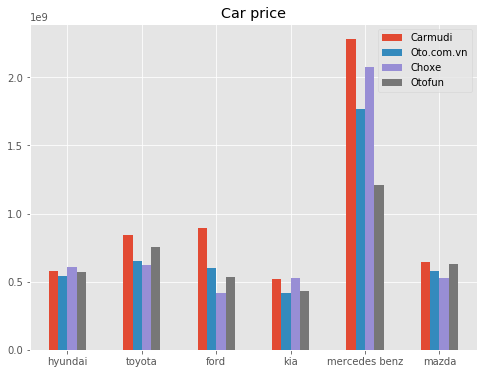

In [41]:
plt.style.use('ggplot')
result.plot.bar(figsize=(8,6), rot=0, title="Car price")

### Observations
As expected, Mercedes Benz is the most expensive brands compared to the rest, it is the brand where price varies the most between the sites. The mid range price includes Toyota and Ford. Finally, the lower price band is very competitive. However, the chart above is too general and cannot show us the price difference between old and new cars. Let's dive deeper into our datasets and find out.

### Compare old car price

In [33]:
old_car_price_by_brand = {}
old_oto_price_by_brand = {}
old_cxe_price_by_brand = {}
old_otf_price_by_brand = {}

pop_brands = (cxe['brand'].value_counts()[:6]).index

# Caculate and fill the dictionaries with means of price belonging to each dataset
for brand in pop_brands:
    price = car.loc[(car['brand'] == brand) & (car['new_bool'] == False),'price']
    try:
        old_car_price_by_brand[brand] = round(price.mean())
    except Exception:
        pass
for brand in pop_brands:
    price = oto.loc[(oto['brand'] == brand) & (oto['new_bool'] == False),'price']
    try:
        old_oto_price_by_brand[brand] = round(price.mean())
    except Exception:
        pass
for brand in pop_brands:
    price = cxe.loc[(cxe['brand'] == brand) & (cxe['new_bool'] == False),'price']
    try:
        old_cxe_price_by_brand[brand] = round(price.mean())
    except Exception:
        pass
for brand in pop_brands:
    price = otf.loc[(otf['brand'] == brand) & (otf['new_bool'] == False),'price']
    try:
        old_otf_price_by_brand[brand] = round(price.mean())
    except Exception:
        pass
    
old_car_series = pd.Series(old_car_price_by_brand)
old_oto_series = pd.Series(old_oto_price_by_brand)
old_cxe_series = pd.Series(old_cxe_price_by_brand)
old_otf_series = pd.Series(old_otf_price_by_brand)

# Concatenate into 1 dataframe
result_old = pd.concat([old_car_series, old_oto_series, old_cxe_series, old_otf_series], axis=1)
result_old.columns = ['Carmudi', 'Oto.com.vn', 'Choxe', 'Otofun']
result_old

,Carmudi,Oto.com.vn,Choxe,Otofun
hyundai,579588235,541454545,605153846,569984615
toyota,841472973,653510526,625580000,753885246
ford,893333333,602826923,416050000,535159091
kia,516678571,416350877,525000000,433828571
mercedes benz,2279025641,1766886364,2072333333,1211773585
mazda,643529412,577043478,528000000,627615316


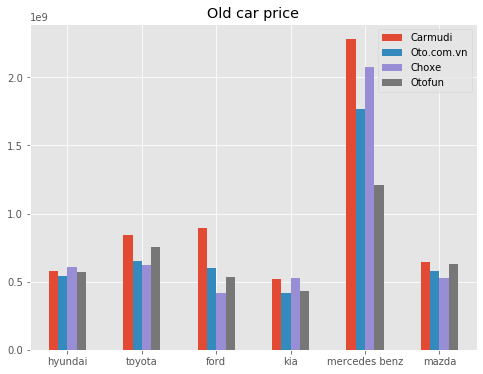

In [40]:
plt.style.use('ggplot')
result_old.plot.bar(figsize=(8,6), rot=0, title="Old car price")

### Compare new car price

In [31]:
new_car_price_by_brand = {}
new_oto_price_by_brand = {}
new_cxe_price_by_brand = {}
new_otf_price_by_brand = {}

pop_brands = (cxe['brand'].value_counts()[:6]).index

# Caculate and fill the dictionaries with means of price belonging to each dataset
for brand in pop_brands:
    price = car.loc[(car['brand'] == brand) & (car['new_bool'] == True),'price']
    try:
        new_car_price_by_brand[brand] = round(price.mean())
    except Exception:
        pass
for brand in pop_brands:
    price = oto.loc[(oto['brand'] == brand) & (oto['new_bool'] == True),'price']
    try:
        new_oto_price_by_brand[brand] = round(price.mean())
    except Exception:
        pass
for brand in pop_brands:
    price = cxe.loc[(cxe['brand'] == brand) & (cxe['new_bool'] == True),'price']
    try:
        new_cxe_price_by_brand[brand] = round(price.mean())
    except Exception:
        pass
for brand in pop_brands:
    price = otf.loc[(otf['brand'] == brand) & (otf['new_bool'] == True),'price']
    try:
        new_otf_price_by_brand[brand] = round(price.mean())
    except Exception:
        pass
    
new_car_series = pd.Series(new_car_price_by_brand)
new_oto_series = pd.Series(new_oto_price_by_brand)
new_cxe_series = pd.Series(new_cxe_price_by_brand)
new_otf_series = pd.Series(new_otf_price_by_brand)

# Concatenate into 1 dataframe
result_new = pd.concat([new_car_series, new_oto_series, new_cxe_series, new_otf_series], axis=1)
result_new.columns = ['Carmudi', 'Oto.com.vn', 'Choxe', 'Otofun']
result_new

,Carmudi,Oto.com.vn,Choxe,Otofun
hyundai,749569620,674159036,644348598,"723,500,000"
toyota,1110818182,910206897,1482254902,"2,687,250,000"
ford,1050176471,1201191489,977313710,"702,428,571"
kia,551967742,576346154,655382716,nan
mercedes benz,3034023256,4429157895,4075256410,nan
mazda,775750000,861600000,814401091,nan


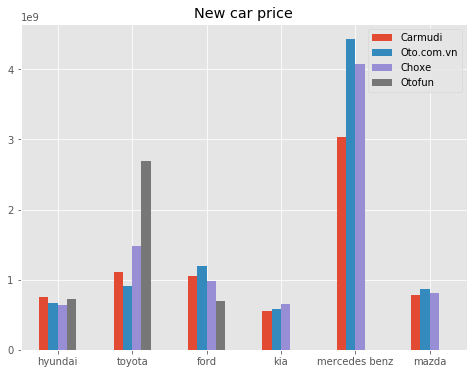

In [39]:
plt.style.use('ggplot')
result_new.plot.bar(figsize=(8,6), rot=0, title="New car price")

## Next steps
Now it is easier to compare the prices. We can take further steps such as collecting more data from more websites or comparing imported and domestic cars.